## Lab 1

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from zipfile import ZipFile
import pandas as pd

### 1. Remembering Gaussians, and covariance matrices.

(a) Generate 1,000 samples of 2 dimensional data from the Gaussian distribution

In [19]:
mean = [-5,5]
covariance = [[20, 0.8],[0.8, 30]]
numOfSamples = 1000

x,y = np.random.multivariate_normal(mean, covariance, numOfSamples).T

(b) Plot these points

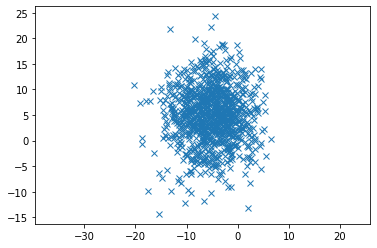

In [20]:
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

(c) Find the eigenvectors and eigenvalues of the covariance matrix:

In [21]:
from numpy import linalg as LA

eigenvalue, eigenvector = np.linalg.eig(covariance)
print("Eigenvalues:",eigenvalue)
print("Eigenvectors:",eigenvector)

Eigenvalues: [19.93640444 30.06359556]
Eigenvectors: [[-0.99685521 -0.07924446]
 [ 0.07924446 -0.99685521]]


(d) Now take the 1,000 points you generated in the first part, and use them to estimate the
mean and covariance matrix for this multi-dimensional data using elementary numpy
commands, i.e., addition, multiplication, division (do not use a command that takes
data and returns the mean or standard deviation).


In [22]:
mean = [0,0]

mean[0] = x.sum()/numOfSamples
mean[1] = y.sum()/numOfSamples


print ("Mean:", np.array(mean))

Mean: [-5.17967527  4.93413824]


In [23]:
computedCovariance = [[0,0],[0,0]]

computedCovariance[0][0] = (((x - mean[0])* (x - mean[0])).sum())/(numOfSamples-1)
computedCovariance[0][1] = (((x - mean[0])* (y - mean[1])).sum())/(numOfSamples-1)
computedCovariance[1][0] = (((y - mean[1])* (x - mean[0])).sum())/(numOfSamples-1)
computedCovariance[1][1] = (((y - mean[1])* (y - mean[1])).sum())/(numOfSamples-1)


print ("Covariance Matrix:", np.array(computedCovariance))

Covariance Matrix: [[19.10556447  0.3047421 ]
 [ 0.3047421  30.57860944]]


### 2. Central Limit Theorem

Central Limit Theorem: For N number of Xᵢ iid random variables with mean 0 and variance 1,
        then (1/√N)* Σ Xᵢ converges to a standard Gaussian.
        
For Zₙ = (1/√N)* Σ Xᵢ , we'll take 1000 samples of Zₙ and plot them on a histogram.

Starting with N = 5

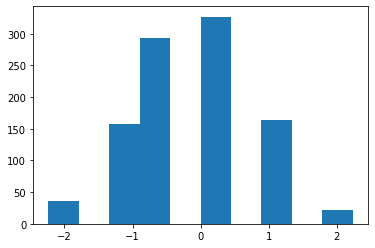

In [24]:
n = 5
xs = np.random.choice([-1,1], [1000, n])
z = xs.sum(axis=1) * (1/np.sqrt(n))
plt.hist(z, bins= 10)
plt.show()

With N = 50, we get closer to a Gaussian

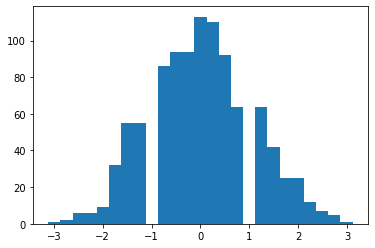

In [25]:
n = 50
xs = np.random.choice([-1,1], [1000, n])
z = xs.sum(axis=1) * (1/np.sqrt(n))
plt.hist(z, bins= 25)
plt.show()

The larger N gets, the closer it resembles a Normal Gaussian. 
N = 250

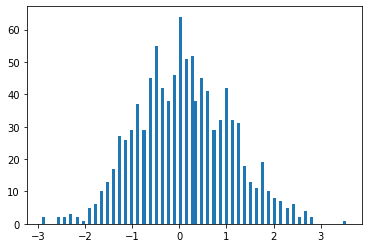

In [26]:
n = 250
xs = np.random.choice([-1,1], [1000, n])
z = xs.sum(axis=1) * (1/np.sqrt(n))
plt.hist(z, bins=100)
plt.show()

### 3. PatientData.csv

In [27]:
import pandas as pd

#Read an excel spreadsheet into a pandas dataframe
df_completion = pd.read_csv("PatientData.csv")

#Print the first 30 rows
df_completion.head(30)

,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0.1,52,44,0.2,0.3,32,0.4,0.5,0.6,0.7,0.8,0.9,0.10,44.1,20,36,0.11,28,0.12,0.13,0.14,0.15,0.16,0.17,52.1,...,0.0.29,8.4,-10.0,0.0.30,0.0.31,0.6.3,5.9,-3.9.1,52.7,-0.3,0.0.32,15.2.1,-8.4,0.0.33,0.0.34,0.9.1,5.1,17.7,70.7,-0.4,0.0.35,13.5,-4.0,0.0.36,0.0.37,0.9.2,3.9,25.5,62.9,-0.3.1,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,66,52,88,?,84,0,36,48,0,0,20,0,0,0,0,0,0,20,44,36,0,0,44,0,0,0,0,0,0,24,...,-0.8,19.8,-48.4,0.0,0.0,1.6,8.7,-114.5,-72.8,2.0,0.0,31.0,-25.7,0.0,0.0,0.8,5.9,29.2,85.8,0.6,0.0,19.5,-11.4,0.0,0.0,0.8,3.3,20.1,49.1,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
5,40,1,160,52,77,129,377,133,77,77,49,75,65,?,70,0,44,0,0,0,24,0,0,0,0,0,0,0,40,32,0,0,24,0,0,0,0,0,0,0,...,0.0,3.7,-11.0,0.0,0.0,-0.5,4.1,-19.8,21.2,0.1,0.0,7.7,-6.4,0.0,0.0,0.4,1.9,1.4,15.4,0.0,0.0,7.4,-2.5,0.0,0.0,0.4,1.3,9.3,18.9,-0.4,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
6,49,1,162,54,78,0,376,157,70,67,7,8,51,?,67,0,44,36,0,0,24,0,0,0,0,0,0,0,52,32,0,0,28,0,0,0,0,0,0,0,...,0.0,2.1,-9.0,0.0,0.0,0.6,3.8,-16.1,21.1,0.1,0.0,6.6,-4.1,0.0,0.0,0.3,1.4,4.7,14.2,-0.2,0.0,8.5,-2.7,0.0,0.0,0.1,0.8,14.5,20.9,-0.3,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
7,44,0,168,56,84,118,354,160,63,61,69,78,66,84,64,0,40,0,0,0,20,0,0,0,0,0,0,0,44,12,0,0,28,0,0,0,0,0,0,0,...,0.0,2.4,-10.3,0.0,0.0,0.3,6.8,-19.3,43.2,0.8,0.0,7.9,-7.3,0.0,0.0,0.9,6.5,5.7,62.9,0.1,0.0,9.3,-3.8,0.0,0.0,0.8,3.8,15.1,48.5,0.1,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
8,50,1,167,67,89,130,383,156,73,85,34,70,71,?,63,0,44,40,0,0,28,0,0,0,0,0,0,0,56,24,0,0,32,0,0,0,0,0,0,0,...,0.0,4.3,-7.3,0.0,0.0,1.1,4.0,-8.9,27.9,-0.5,0.0,7.0,-3.2,0.0,0.0,1.1,1.3,13.2,22.3,-0.5,0.0,10.9,-2.5,0.0,0.0,1.0,1.0,23.8,29.6,-0.5,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10
9,62,0,170,72,102,135,401,156,83,72,71,68,72,?,70,20,36,48,0,0,36,0,0,0,0,0,0,0,52,0,0,0,28,0,0,0,0,0,0,0,...,-2.5,11.9,-18.6,0.0,0.0,-0.2,-5.2,-34.7,-76.3,-1.4,-1.7,16.7,-13.3,0.0,0.0,0.9,-3.1,-12.5,-37.3,-0.9,-0.8,12.7,-5.7,0.0,0.0,0.8,-0.3,6.1,3.7,-0.4,-0.5,9.0,-2.0,0.0,0.0,0.8,0.9,12.3,19.3,3


(a) How many patients and how many features are there? **451 Patients and 280 Features**

In [28]:
print(df_completion.shape)

(451, 280)


(b) What is the meaning of the first 4 features? See if you can understand what they mean. **We believe it is age, gender, height in cm, weight in kg**

0
83
2
105
780
166.13525498891352


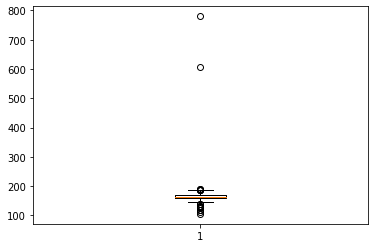

6
176
68.14412416851441


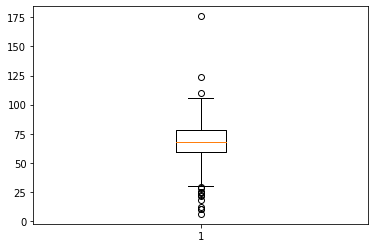

In [29]:
print(df_completion['75'].min())
print(df_completion['75'].max()) #min is 0 and max is 83, we can assume this corresponds with age

print(df_completion['0'].nunique()) #2nd feature only has 2 values, we can assume this corresponds with male and female

print(df_completion['190'].min())
print(df_completion['190'].max())
print(df_completion['190'].mean()) #min is 105 and max is 780 and mean is 166.135
plt.boxplot(df_completion['190']) # the data contains outliers 
plt.show()                        # once we realise there are outliers, we can assume that this corresponds with height

print(df_completion['80'].min())
print(df_completion['80'].max())
print(df_completion['80'].mean())#min is 6 and max is 176 and mean is 68.144, we think it corresponds with weight
plt.boxplot(df_completion['80'])
plt.show()


(c) Are there missing values? Replace them with the average of the corresponding feature
column

In [30]:
indexes = df_completion.index
df_completion.replace('?', np.nan, inplace=True)
df_completion.replace('', np.nan, inplace=True)
    
for name, col in df_completion.iteritems():
    
    mean = 0;
    replace1 = True
    df_temp = df_completion[name].copy()
    
    for i in df_temp.index:
        if type(df_temp.at[i]) is object or type(df_temp.at[i]) is str:
            if(df_temp.at[i]=='?'):
                print("pop ",df_temp.at[i], " ", i, " ", name)
                df_temp.pop(i)
                df_temp.replace(df_temp.at[i], np.nan, inplace=True)
            else:
                try:
                    idk = float(df_temp.at[i])
                    df_temp.replace(df_temp.at[i], idk, inplace=True)
                    df_completion[name].replace(df_temp.at[i], idk, inplace=True)
                except:
                    df_temp.pop(i)
                    df_temp.replace(df_temp.at[i], np.nan, inplace=True)
                    df_completion[name].replace(df_temp.at[i], np.nan, inplace=True)
    
    df_temp.dropna(inplace=True)
    mean = df_temp.mean()
    if type(mean) is float:
        mean = round(mean, 2)
    df_completion[str(name)].replace(np.nan, mean, inplace=True)

In [31]:
'?' in df_completion.values

False

(d) How could you test which features strongly influence the patient condition and which
do not? This question is more open-ended than the previous ones. **We can use linear regression and use the p scores from the linear regression model to determine which features are the most important**

(e) List what you think are the three most important features. **Most important feature index are: 234, 103, 71**

In [32]:
from sklearn.linear_model import LinearRegression


X = df_completion.iloc[: , :279]
y = df_completion.iloc[: , -1]

reg = LinearRegression()
reg.fit(X, y)

scores = reg.coef_

vals = dict()
for i in range(len(scores)):
    vals[i] = scores[i]
    
vals = {key: val for key, val in sorted(vals.items(), key=lambda x: x[1])} #sort to find the most important features
print(vals)

{234: -418.8601047928812, 103: -27.605034811983625, 71: -22.543541081366616, 224: -18.656113194439136, 155: -16.698885963071632, 93: -15.587353526807803, 84: -15.483548353728713, 144: -14.729855071088107, 134: -13.176025307418984, 263: -10.359988106043732, 59: -10.055481073159763, 58: -9.793699269853608, 96: -8.778270380030825, 97: -8.163979817862739, 109: -7.41382415474438, 26: -7.317338245813801, 50: -6.416921246231144, 72: -4.864904823229289, 57: -4.781683927174475, 121: -4.571273750088122, 47: -4.336018584613591, 105: -4.14040817661221, 184: -3.9925720169982757, 62: -3.439675883289473, 213: -2.8500765851024057, 117: -2.8010523377979784, 170: -2.6920827323765666, 122: -2.6160749314767435, 159: -2.414655653981053, 154: -2.401516163947769, 259: -2.3582952095957084, 179: -2.330898850715002, 186: -2.3028567469101113, 74: -2.273021142398425, 214: -2.2307680771800897, 162: -2.1713153605938946, 196: -1.9893688832487733, 91: -1.9784824837934267, 23: -1.9473735781421888, 265: -1.865341558762

<BarContainer object of 279 artists>

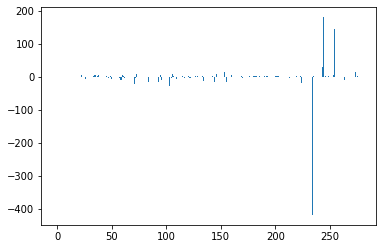

In [33]:
plt.bar([x for x in range(len(scores))], scores) 

### 4. Names and Frequencies

Uses Names.zip and creates a dict of DataFrames (one DataFrame per year)

In [34]:
zfile = ZipFile("Names.zip",'r')
filelist = zfile.namelist()
years = {}
for name in filelist:
    
    with zfile.open(name, 'r') as file:
        indexD ={}
        entire = file.read().decode();
        lines = entire.split("\r\n")
        names = []
        females = []
        males = []
        totals = []
        diffs = []
        index = 0;
        for line in lines:
            if line != '':
                dataz = line.split(",")
                info = int(dataz[2])
                if(dataz[1]=="M"):
                    if dataz[0] in indexD:
                        i = indexD[dataz[0]]
                        males[i] = info
                        totals[i] = females[i] + males[i]
                        diffs[i] = females[i] - males[i]
                    else:
                        names.append(dataz[0])
                        indexD[dataz[0]] = index;
                        index+=1
                        males.append(info)
                        females.append(0)
                        totals.append(info)
                        diffs.append(0 - info)
                else:
                    names.append(dataz[0])
                    indexD[dataz[0]] = index;
                    index+=1
                    females.append(info)
                    males.append(0)
                    totals.append(info)
                    diffs.append(info - 0)
                
        yeare = {
            "F": females,
            "M": males,
            "Total": totals,
            "Diff": diffs
        }
        df = pd.DataFrame(yeare,index=names)
        years[name[3:7]] = df
        
print(years["2000"])

UnicodeDecodeError: ignored

 Write a program that on input k and XXXX, returns the top k names from year
XXXX

In [ ]:
k = 10
XXXX = "1890"

df_sorted = years[XXXX].nlargest(k, "Total")
print("Top",str(k),"names of",XXXX)
print(df_sorted.filter(items=["Total"]))

Write a program that on input Name returns the frequency for men and women of the
name Name, across all years.

In [ ]:
name = "Azriel"


print(name+"\n")
print("Year\t  F\t  M")
print("------------------------")

for yr in range(1880, 2016):
    df = years[str(yr)]
    if name in df.index:
        print(str(yr),'\t',df.loc[name,"F"],'\t',df.loc[name,"M"])
        

Find at least one name that used to be more popular for one gender, but then became
more popular for another gender. If you can, find all of them.

In [ ]:
names = []

posDiff = {}
#Name : MaxPosDiff YrMaxPosDiff
negDiff = {}
#Name : MaxNegDiff YrMaxNegDiff
for yr in range(1880, 2016):
    df = years[str(yr)];
    
    for name, row in df.iterrows():
        diff = row[3]
        if diff>0:
            if name in posDiff:
                if diff> posDiff[name][0]:
                    posDiff[name][0]= diff
                    posDiff[name][1]= yr
            else:
                posDiff[name] = [diff, yr]
                if name in negDiff:
                    names.append(name)
        elif diff<0:
            if name in negDiff:
                if diff< negDiff[name][0]:
                    negDiff[name][0]= diff
                    negDiff[name][1]= yr
            else:
                negDiff[name] = [diff, yr]
                if name in posDiff:
                    names.append(name)

The code above takes a while to run, but it creates the data sets that are sorted and printed out below

In [ ]:
maxdiffs = []

posNums = []
posYrs = []
negNums = []
negYrs = []
for name in names:
    pos = posDiff[name]
    neg = negDiff[name]
    posNums.append(pos[0])
    negNums.append(neg[0])
    posYrs.append(pos[1])
    negYrs.append(neg[1])
    maxdiffs.append(pos[0]-neg[0])
    
dfDict = {
    "F Year" : posYrs,
    "# of F" : posNums,
    "M Year" : negYrs,
    "# of M" : negNums,
    "Max Diff" : maxdiffs
}

df = pd.DataFrame(dfDict, index=names)
print(df.sort_values(by="Max Diff", ascending=False))

### 5. Decision Trees and MNIST.

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


How many data points are there, how many features are there, and what do the features
represent?
**There are 70000 data points and 784 features for each data point. Each feature represents level of gray (where 1 is white and 255 is black) for the 28x28 pixels in the image.**

In [ ]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

t0 = time.time()
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

print('shape of data points: ', X.shape)
print('The feature vector is', X[0])

Compute how many times each digit appears in the dataset.
**['0' 6903]['1' 7877]['2' 6990]['3' 7141]['4' 6824]['5' 6313]['6' 6876]['7' 7293]['8' 6825]['9' 6958]**

In [ ]:
(diff, digit) = np.unique(y, return_counts=True)
countOfDigits = np.asarray((diff, digit)).T

print(countOfDigits)

Read the documentation for sklearn.model selection.train test split and explain
what this does.
**This allows for seperation of the array/matrix data into training and testing subsets randomly.**

Read the documentation for DecisionTreeClassifier, and explain what score means.
**When inputted test data and the labels, the score will provide the mean accuracy of the test data against the labels.**

What happens to the training score as you increase the depth of the tree? Explain.
**The training score will increase as you increase the depth of the tree. This is because as you increase the depth of the tree the decision tree will learn to better fit the training data.**


In [ ]:
N_tr = 20
train_samples = N_tr
X_tr = X[:N_tr,:]
y_tr = y[:N_tr]
# check size
X_tr.shape

for i in range(10):
    decision_tree = tree.DecisionTreeClassifier(max_depth=i+1)
    decision_tree.fit(X_tr, y_tr)
    tree.plot_tree(decision_tree) 

    train_score = decision_tree.score(X_tr,y_tr)
    print("Train score: %.4f" % train_score, 'tree depth: ', i+1)


What happens to the difference between training score and testing score as you
increase the depth of the tree? Explain.
**If you set the max depth too high, while the training score will go up, the test score may go down. Setting the max depth too high will result in overfitting of the model to the training data and making the model less generalizable.**

In [ ]:
train_samples = 30000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=70000-train_samples, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

training_scores = []
testing_scores = []
depth_values = range(15) #as you increase the depth of the tree the train
# score increases but test sccore starts decreasing once it overfits
for depth in range(0, 50, 5):
    print(depth)
    dt = tree.DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
    dt.fit(X_train,y_train)
    train_score = dt.score(X_train,y_train)
    test_score = dt.score(X_test, y_test)
    training_scores.append(train_score)
    testing_scores.append(test_score)
    
fig, ax = plt.subplots()
ax.plot(training_scores,label='training')
ax.plot(testing_scores,label='testing')
ax.set_xlabel('tree depth')  
ax.set_ylabel('accuracy')
ax.set_title("Train vs Test") 
ax.legend(); 

Fix the depth of the tree, say, depth=7. Then plot the difference of training score -
testing score when you train on: 100, 500, 5000, 10000, 15,0000, 20,000, 25,000 points,
always computing testing score by evaluating on the complement of the training set.
Plot this trend. Try to explain what you are seeing. **As we increase the number of points we train on, the training score goes down while test score goes up till the converge to the same score. This is because increasing the number of points the model trains on will make the model more generalizable**

In [ ]:
sizes = [100, 500, 5000, 10000, 15000, 20000, 25000]
training_scores = []
testing_scores = []

# score increases but test sccore starts decreasing once it overfits
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=size, test_size=70000-size, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    dt = tree.DecisionTreeClassifier(max_depth=7, criterion='gini')
    dt.fit(X_train,y_train)
    train_score = dt.score(X_train,y_train)
    test_score = dt.score(X_test, y_test)
    training_scores.append(train_score)
    testing_scores.append(test_score)
    print('train_score: ', train_score, 'test_score: ', test_score)
    
fig, ax = plt.subplots()
ax.plot(np.subtract(training_scores, testing_scores), label='training score - testing score')
ax.set_xlabel('tree depth')  
ax.set_ylabel('accuracy')
ax.set_title("Train vs Test") 
ax.legend(); 

### 6. Decision Trees and CIFAR10

In [ ]:
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn import tree

In [ ]:
# We load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('These are the labels', y_train)
print('And here is a feature vector',X_train[0])


How many data points are there, and how many labels? How many points for each
label? **There are 60,000 total data points, (50,000 training and 10,000 test). There are 10 labels. There are a total of 6000 points for each label (5000 training and 1000 test)**

In [ ]:
print('train X shape: ', X_train.shape, 'test X shape: ', X_test.shape)
print('train y shape: ', y_train.shape, 'test y shape: ', y_test.shape)
print('labels length: ', len(labels))
(diff, digit) = np.unique(y_train, return_counts=True)
countOfDigits = np.asarray((diff, digit)).T

print('num features per label train: ', countOfDigits)

(diff, digit) = np.unique(y_test, return_counts=True)
countOfDigits = np.asarray((diff, digit)).T

print('num features per label test: ', countOfDigits)

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(5):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
"""
(1) TO DO

Reshape X_train into a matrix X_tr so that each row is a data point.
What are the dimensions of X?
"""

X_tr = X_train.reshape((50000, 3072))
print('What are the dimensions of X? ', X_tr.shape)

In [ ]:
# There are many data points. Let's just pick a subset of them.
# The loader already shuffled, so it's safe to just pick the first ones.
N_tr = 5000
train_samples = N_tr
X_str = X_tr[:N_tr,:]
y_str = y_train[:N_tr]
# check size
X_str.shape

# We now create a decision tree.
# The only parameter we pass is the max depth
decision_tree = tree.DecisionTreeClassifier(max_depth=8)

# Now we actually train it -- this is the computationally intensive step
decision_tree.fit(X_str, y_str)

# This is what it looks like
tree.plot_tree(decision_tree) 

# And this is its accuracy on the training data
train_score = decision_tree.score(X_str,y_str)
print("Train score: %.4f" % train_score)

print(X_test.shape)



In [ ]:
"""
(2) TO DO

Similarly to what we did with the MNIST data set: 
Generate decision trees of depth 1 to 15, and for each, compute
the training accuracy and the testing accuracy.
(Hint: Note that you will also have to reshape your test points!)

Then, as we did for MNIST, report the training and test scores,
and then plot them both on a common plot. 
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_t = X_test.reshape((10000, 3072))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_t)

#since shuffled we can just take the first subset of points
N_tr = 5000
X_train_new = X_train[:N_tr,:]
y_train_new = y_train[:N_tr]

N_t = 1000
X_test_new = X_test[:N_t,:]
y_test_new = y_test[:N_t]

training_scores = []
testing_scores = []
depth_values = range(15)
for depth in depth_values:
    dt = tree.DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
    dt.fit(X_train_new,y_train_new)
    train_score = dt.score(X_train_new,y_train_new)
    test_score = dt.score(X_test_new, y_test_new)
    training_scores.append(train_score)
    testing_scores.append(test_score)
    
    
print('These are the training scores:',training_scores)
print('These are the testing scores:',testing_scores)


In [ ]:
# Easier to see them on a graph, vs depth of tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(training_scores,label='training')
ax.plot(testing_scores,label='testing')
ax.set_xlabel('tree depth')  # Add an x-label to the axes.
ax.set_ylabel('accuracy')  # Add a y-label to the axes.
ax.set_title("Train vs Test")  # Add a title to the axes.
ax.legend();  # Add a legend.